<a href="https://colab.research.google.com/github/VishanOberoi/Machine-Learning-/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML LAB 5

Vishan Oberoi 

i033


Kmeans clustering



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from sklearn.datasets import make_blobs
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset,classes = make_blobs(n_samples = 250, n_features= 2, centers= 4, cluster_std= 0.5, random_state = 5)

In [ ]:
df = pd.DataFrame(dataset, columns = ['var1', 'var2'])
df

,var1,var2
0,-5.061917,7.770857
1,-0.669163,1.956338
2,-0.705389,1.821384
3,5.940428,-0.543015
4,-5.983371,8.675050
...,...,...
245,-5.996076,7.203392
246,4.862897,0.401095
247,0.094670,2.487797
248,-0.314684,3.557554


In [ ]:
df.head()

,var1,var2
0,-5.061917,7.770857
1,-0.669163,1.956338
2,-0.705389,1.821384
3,5.940428,-0.543015
4,-5.983371,8.675050


Text(0, 0.5, 'Var2')

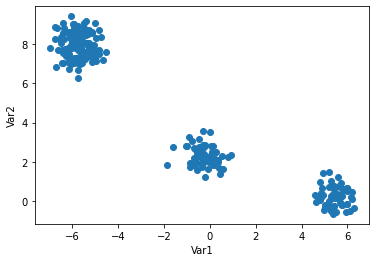

In [ ]:
fig = plt.figure()
x = df["var1"]
y = df["var2"]
plt.scatter(x,y)
plt.xlabel("Var1")
plt.ylabel("Var2")

Text(0, 0.5, 'Var2')

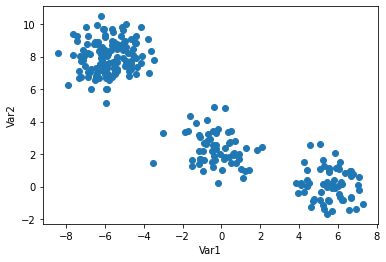

In [ ]:
dataset,classes = make_blobs(n_samples = 250, n_features= 2, centers= 4, cluster_std= 1, random_state = 5)
fig = plt.figure()
df = pd.DataFrame(dataset, columns = ['var1', 'var2'])
x = df["var1"]
y = df["var2"]
plt.scatter(x,y)
plt.xlabel("Var1")
plt.ylabel("Var2")

Text(0, 0.5, 'Var2')

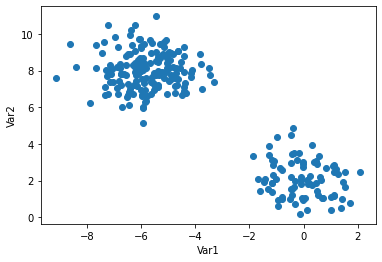

In [ ]:
dataset,classes = make_blobs(n_samples = 250, n_features= 2, centers= 3, cluster_std= 1, random_state = 5)
df = pd.DataFrame(dataset, columns = ['var1', 'var2'])
fig = plt.figure()
x = df["var1"]
y = df["var2"]
plt.scatter(x,y)
plt.xlabel("Var1")
plt.ylabel("Var2")

In [ ]:
#Kmeans
from sklearn.cluster import KMeans


In [ ]:
kmeans = KMeans(3)

In [ ]:
kmeans.fit(df)

KMeans(n_clusters=3)

In [ ]:
kmeans.cluster_centers_

array([[-6.52868931,  7.39543831],
       [-0.0463406 ,  2.11384317],
       [-5.22801681,  8.47435625]])

In [ ]:
kmeans.labels_

array([1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0,
       0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0,
       1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0,
       0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0,
       0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 2, 0, 1, 0, 0], dtype=int32)

In [ ]:
kmeans.n_iter_

8

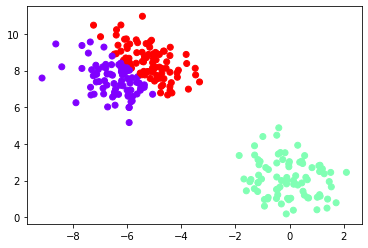

In [ ]:
#Plot cluster. Each cluster should have different colours

labels = kmeans.fit_predict(df)
df_with_clusters = df.copy()
df_with_clusters['clusters'] = labels

plt.scatter(df_with_clusters['var1'], df_with_clusters['var2'], c = df_with_clusters['clusters'], cmap = 'rainbow')

In [ ]:
#Optimum number of clusters
diameter = []
for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(df)
  diameter_iter = kmeans.inertia_
  diameter.append(diameter_iter)


Text(0, 0.5, 'Diameter of the clusters')

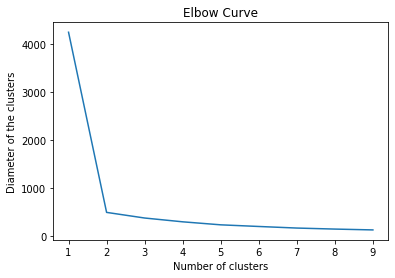

In [ ]:
number_clusters = range(1,10)
plt.plot(number_clusters, diameter)
plt.title("Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("Diameter of the clusters")



In [ ]:
#KMeans on iris

dataset = pd.read_csv('/content/Iris.csv')
X = dataset.iloc[:, 0:-1].values

dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


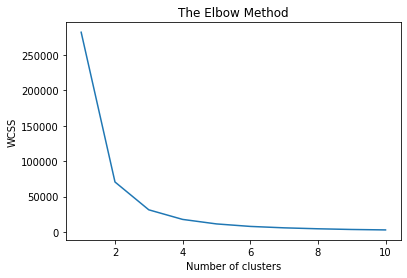

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# comparing the elbow value found, with the number of species actually present
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

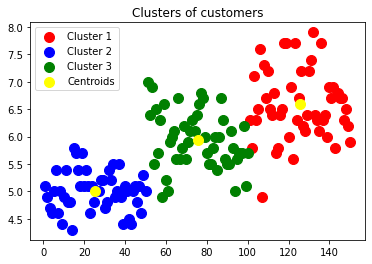

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.legend()
plt.show()

In [ ]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
dataset['Species'].values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

#Conclusion
In this lab i got to explore and learn about Kmeans clustering, elbow curve and implement it on the iris dataset.